## Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler

## Loading the Dataset

In [9]:
filepath = r"C:\Users\padma\Desktop\Computer_Science\al-ml\Datasets\train_loan.csv"

loan_data = pd.read_csv(filepath)

loan_data.head()


0      LP001002
1      LP001003
2      LP001005
3      LP001006
4      LP001008
         ...   
609    LP002978
610    LP002979
611    LP002983
612    LP002984
613    LP002990
Name: Loan_ID, Length: 614, dtype: object

In [3]:
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Different Preprocessing Steps

#### Exploring the data before finding missing values

In [30]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [31]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


out of the 13 columns, only 5 are float and rest all is object type.

dependents column should be a numerical one, but is shown as object type.


In [32]:
#Checking dependents column

loan_data['Dependents'].unique()


array(['0', '1', '2', '3+'], dtype=object)

the data inside the dependents column is string type, has a value called 3+ and has missing values.

### Missing value Handling

In [33]:
# Checking for missing values

check_null =loan_data.isnull().sum()

check_null[check_null!= 0]

Series([], dtype: int64)

The above columns have missing values in them and it is a small % when compared to the whole data , so further exploring each column.

#### Column Gender

In [34]:
#Checking unique values in it

loan_data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [35]:
#since it has categorical dat, replacing missing values with the mode of the data

loan_data['Gender'].fillna(loan_data['Gender'].mode()[0], inplace=True)

#again checking the null values in the column.
loan_data['Gender'].isnull().sum()

C:\Users\padma\AppData\Local\Temp\ipykernel_24784\312959111.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data['Gender'].fillna(loan_data['Gender'].mode()[0], inplace=True)


0

#### Column Married

In [36]:
#Checking the unique values in the column
loan_data['Married'].unique()


array(['No', 'Yes'], dtype=object)

In [37]:
#Since the data is string type, replacing the nan with mode of the data

loan_data['Married'].fillna(loan_data['Married'].mode()[0], inplace=True)

#Again checking null values

loan_data['Married'].isna().sum()

C:\Users\padma\AppData\Local\Temp\ipykernel_24784\3292282134.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data['Married'].fillna(loan_data['Married'].mode()[0], inplace=True)


0

#### Column Dependents

In [38]:
#Checking the unique values in the column
loan_data['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [39]:
#Since the data is string type, replacing the nan with mode of the data

loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0], inplace=True)

#Again checking null values

loan_data['Dependents'].isna().sum()

C:\Users\padma\AppData\Local\Temp\ipykernel_24784\3815156653.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0], inplace=True)


0

#### Column Self_employed

In [40]:
#Checking the unique values in the column
loan_data['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [41]:
#Since the data is string type, replacing the nan with mode of the data

loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0], inplace=True)

#Again checking null values

loan_data['Self_Employed'].isna().sum()

C:\Users\padma\AppData\Local\Temp\ipykernel_24784\3965014393.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0], inplace=True)


0

#### Column Loan Amount

In [42]:
#Checking the unique values in the column
loan_data['LoanAmount'].unique()

array([128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70., 109.,
       200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315., 116.,
       112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320., 144.,
       184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97., 135.,
       180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187., 113.,
       176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,  25.,
       137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,  85.,
       259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242., 129.,
        30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87., 101.,
       495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,  90.,
       166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,  42.,
       280., 140., 155., 123., 279., 192., 304., 330., 150., 207., 436.,
        78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300., 376.,
       117.,  71., 490., 173.,  46., 228., 308., 23

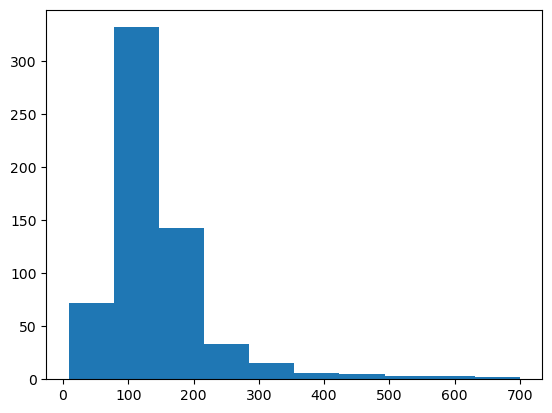

In [43]:
#Since the data is numeric, plotting a histogram to see if the data is normal or not

plt.hist(loan_data['LoanAmount'])
plt.show()


In [44]:
#Since the data is positively skewed, using median to replace the nan values

loan_data['LoanAmount'] = loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].median())

#Confirming there are no missing values

loan_data['LoanAmount'].isnull().sum()


0

#### Column loan amount term

In [45]:
#Checking the unique values in the column
loan_data['Loan_Amount_Term'].unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [46]:
#Replacing the nan values with medain of the data

loan_data['Loan_Amount_Term'] = loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].median())

#Again checking null values

loan_data['Loan_Amount_Term'].isna().sum()

0

#### Column credit history

In [47]:
#Checking the unique values in the column
loan_data['Credit_History'].unique()

array([1., 0.])

In [48]:
#Since there are only 2 values, replacing the null values with the mode of the data

loan_data.fillna({'Credit_History': loan_data['Credit_History'].mode()[0]}, inplace=True)

#Confirming there are no null values
loan_data['Credit_History'].isna().sum()

0

all missing values have been handled

In [49]:
loan_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Outlier detection

In [50]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [51]:
#Checking dtypes of columns to find the numerical ones for outlier detection
loan_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [52]:
numerical_cols =loan_data.select_dtypes(include=['int64', 'float64'])
numerical_cols

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,128.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


The above listed columns are the numerical columns in the data that may have outliers.

credit history column has only 2 values , so outlier detection is not needed.

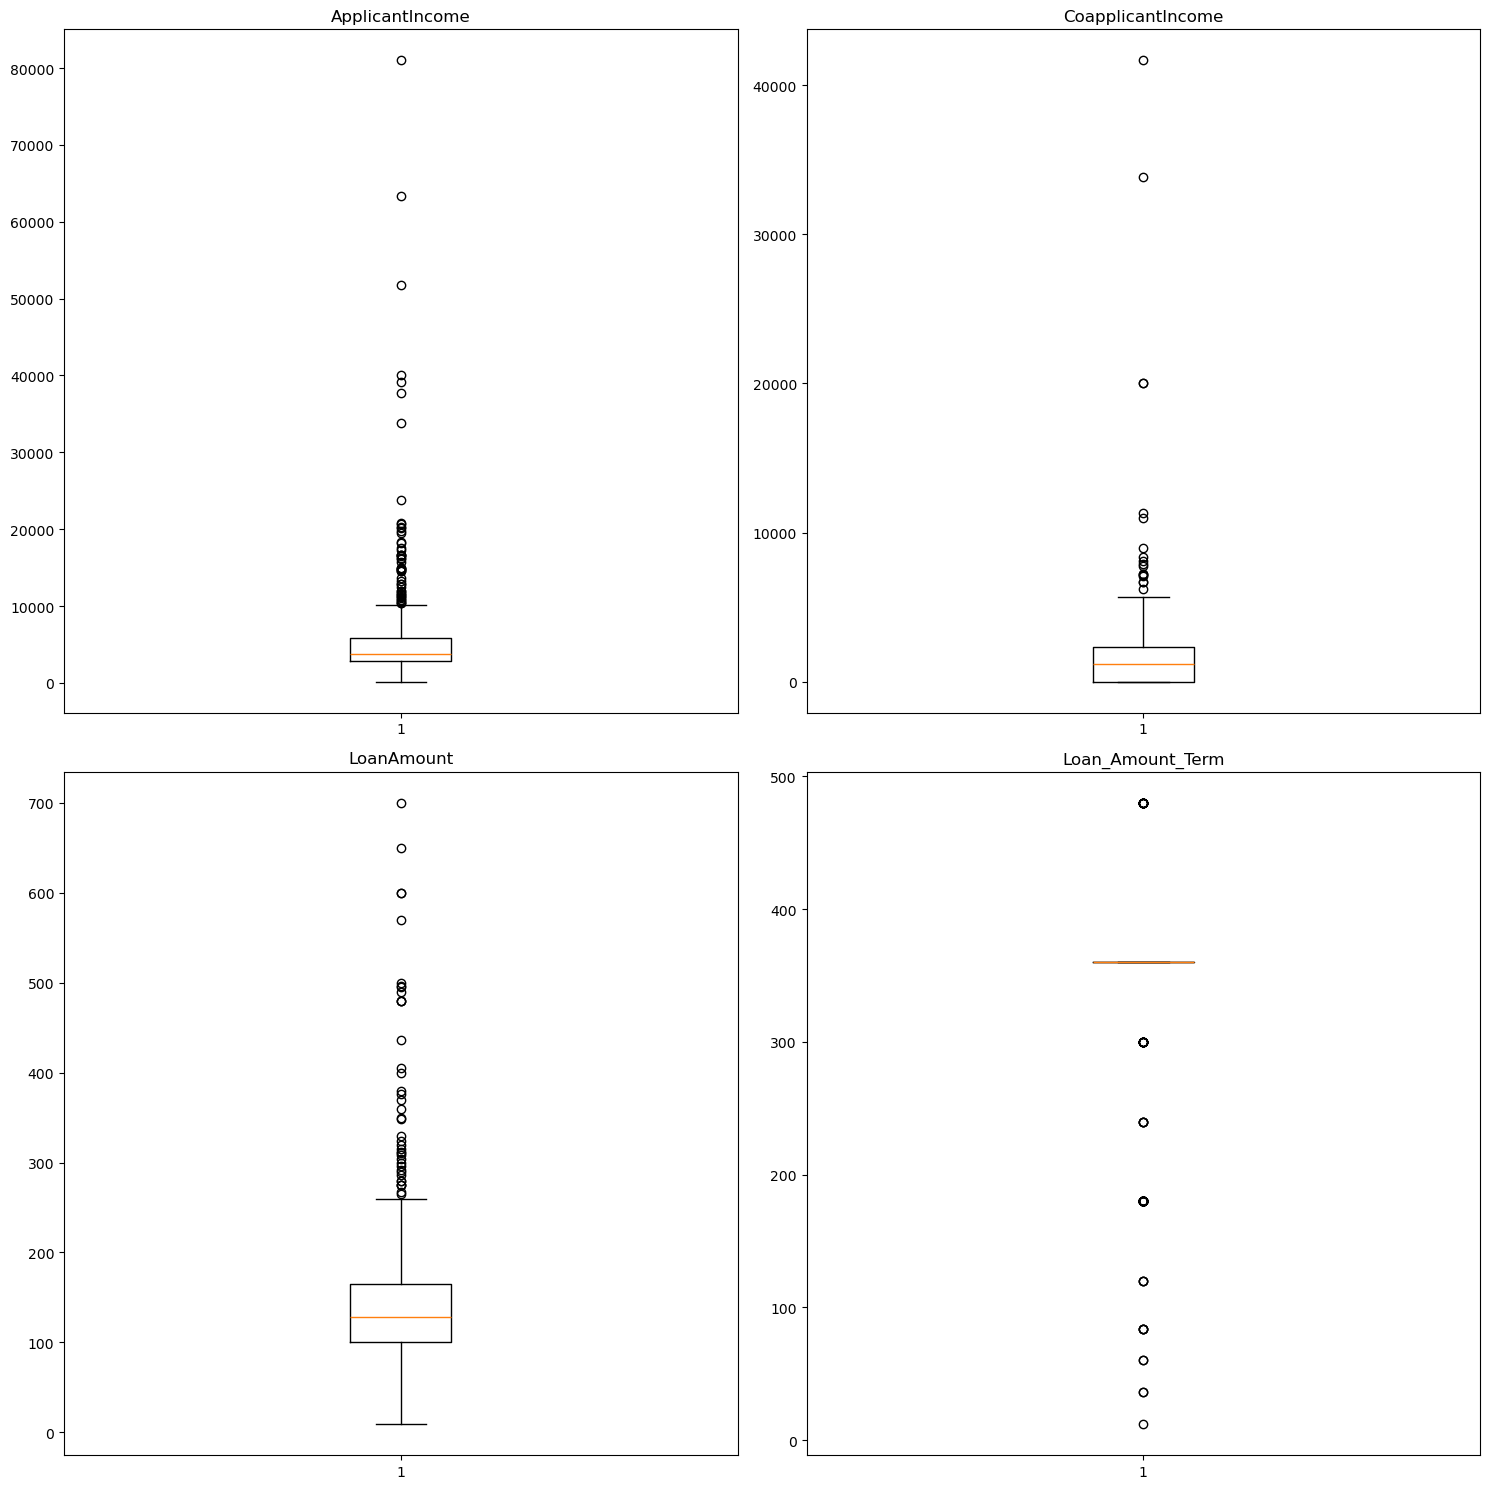

In [53]:
#Creating subplots to plot boxplot for all numerical columns execpt credit history
fig, ax = plt.subplots(2,2, figsize =(15,15))
axes = []      #creating a list to store axes values
for i in range(0,2):
    for j in range(0,2):
        axes.append(ax[i][j])


for val,col in enumerate(numerical_cols):
    if col == 'Credit_History':
        continue
    axes[val].boxplot(loan_data[col])
    axes[val].set_title(col)

    
plt.tight_layout()
plt.show()


As the boxplots are showing many outliers, the data may be skewed and removing all the ouliers may not be a good choice

Also , for all the columns above, outliers need not be removed as the data is about loan, extreme values are needed.


### Encoding

In [54]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [55]:
#checking for numerical and categorical features

loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Changing the categorical features into numeric features.

for some features, a mapping is enough to change the string data into numeric values.

In [56]:
loan_data['Loan_ID'].nunique()

#for loan ID, as it has a unique value for each row, and as it is just a number indicating each loan, it has no predictive value.

614

In [59]:
#Dropping loan id

loan_data = loan_data.drop('Loan_ID', axis=1)


In [63]:
loan_data.head(2)  #loan id has been dropped.

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,Urban,1
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0


In [61]:

for col in loan_data.select_dtypes(include= 'object'):
    
    print(col)
    print(loan_data[col].unique())
    print()


Gender
['Male' 'Female']

Married
['No' 'Yes']

Dependents
['0' '1' '2' '3+']

Education
['Graduate' 'Not Graduate']

Self_Employed
['No' 'Yes']

Property_Area
['Urban' 'Rural' 'Semiurban']

Loan_Status
['Y' 'N']



for all the categorical features except loan id, there are only 2 or 3 unique values, so for some features mapping is going to be used and for others label encoding.

In [64]:
#mapping the values to 0 and 1 for values in gender, Married, education, self_employed and loan status columns

dict = {'Male':0, 'Female':1, 'Yes':1, 'No':0,'Graduate':1,'Not Graduate':0,'Y':1,'N':0}

for col in loan_data.select_dtypes(include= 'object'):
    if col == 'Property_Area' or col == 'Dependents':
        continue
    loan_data[col] = loan_data[col].map(dict)


loan_data.head()



,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,Urban,1
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1


In [65]:
# for columns property area and dependents, label encoding is going to be used.

label_encode = LabelEncoder()
loan_data['Property_Area'] = label_encode.fit_transform(loan_data['Property_Area'])
loan_data['Dependents'] = label_encode.fit_transform(loan_data['Dependents'])

loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1


### Scaling

Out of the numerical columns, applicant income, coapplicant income, loan amount and loan amount term columns are the ones to be scaled as the rest all are encoded.

In [66]:
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1


In [67]:
cols_to_scale = ['ApplicantIncome',	'CoapplicantIncome',	'LoanAmount',	'Loan_Amount_Term']

#using standard sacling on these columns
for col in cols_to_scale:
    sc = StandardScaler()
    loan_data[col] = sc.fit_transform(loan_data[[col]])

Again checking the data

In [68]:
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,0.072991,-0.554487,-0.211241,0.273231,1.0,2,1
1,0,1,1,1,0,-0.134412,-0.038732,-0.211241,0.273231,1.0,0,0
2,0,1,0,1,1,-0.393747,-0.554487,-0.948996,0.273231,1.0,2,1
3,0,1,0,0,0,-0.462062,0.251980,-0.306435,0.273231,1.0,2,1
4,0,0,0,1,0,0.097728,-0.554487,-0.056551,0.273231,1.0,2,1


In [70]:
loan_data.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(5), int32(2), int64(5)
memory usage: 52.9 KB
